In [1]:
import pandas as pd
act = pd.read_csv("D:/000-Master/UserClustering/sample_activity_Oct-22-2018.csv")
# act.head()
# print(act.columns)
act.rename(columns = {'Unnamed: 0':'index'},inplace=True)

import numpy as np
np.shape(act) # (149408, 8)
# act['city'].describe()
act['user_id'] = act['user_id'].astype('category')
act['city'] = act['city'].astype('category')
act.info()

# # of locations
len(set(act['orig_loc_id'])) #4365
len(set(act['dest_loc_id'])) #9052

act.head(3)
# print(len(act.user_id.unique())) #1320

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149408 entries, 0 to 149407
Data columns (total 8 columns):
index               149408 non-null int64
trip_id             149408 non-null int64
user_id             149408 non-null category
orig_loc_id         149408 non-null int64
dest_loc_id         149408 non-null int64
local_start_time    149408 non-null object
local_end_time      149408 non-null object
city                149408 non-null category
dtypes: category(2), int64(4), object(2)
memory usage: 7.3+ MB


,index,trip_id,user_id,orig_loc_id,dest_loc_id,local_start_time,local_end_time,city
0,1,2081071,16094,1,2,2018-03-14 12:07:18-06:00,2018-03-14 12:18:51.344355-06:00,elpaso
1,2,2098189,16094,2,3,2018-03-19 15:08:39-06:00,2018-03-19 15:26:16.293650-06:00,elpaso
2,4,2102389,16094,2,5,2018-03-20 14:44:31-06:00,2018-03-20 15:08:04.074334-06:00,elpaso


In [5]:
loc = pd.read_csv("D:/000-Master/UserClustering/sample_location_Oct-22-2018.csv")
loc.rename(columns = {'Unnamed: 0':'index'},inplace=True)

loc['user_id'] = loc['user_id'].astype('category')
loc['city'] = loc['city'].astype('category')

loc.head(3)

,index,loc_id,user_id,center_lat,center_lon,fan_in,fan_out,city,cluster,last_updated_utc
0,0,6143,10450,30.390483,-97.758553,69,69,austin,"[[30.390023, -97.758607], [30.390023, -97.7586...",2018-10-22 08:15:14.107617+00:00
1,1,18313,36801,31.756002,-106.270991,3,3,elpaso,"[[31.756002, -106.270991], [31.756002, -106.27...",2018-10-10 18:15:35.165449+00:00
2,2,18315,36820,31.769734,-106.372696,4,1,elpaso,"[[31.769734, -106.372696]]",2018-10-22 08:23:05.261713+00:00


In [6]:
### Descriptive
### Important LOCATIONS
import numpy as np
import matplotlib.pyplot as plt

np.shape(loc) #(5000, 10)
# loc.info()

locStats = loc[['loc_id','user_id','city']].groupby(['user_id','city']).size().reset_index(name='count') #每个人有多少个important locations
locStats = locStats.dropna()
# locStats = locStats.rename(columns={'loc_id':'count'})
locStats.head()

# print(locStats.loc[locStats['city'] == 'tucson'].shape[0])
# print(locStats.loc[locStats['city'] == 'elpaso'].shape[0])
# print(locStats.loc[locStats['city'] == 'austin'].shape[0])

,user_id,city,count
0,2,tucson,7
1,561,austin,3
2,651,austin,3
3,667,austin,3
4,705,austin,2


In [7]:
numBar = locStats.groupby(['count','city']).size().reset_index(name='counts') # 
numBar.head()

,count,city,counts
0,1,austin,70
1,1,elpaso,242
2,1,tucson,81
3,2,austin,66
4,2,elpaso,189


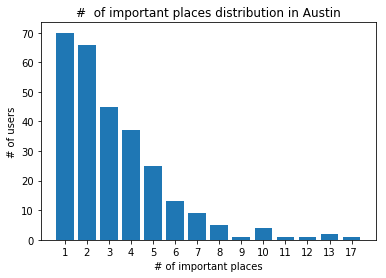

In [8]:
# Create bars
df = numBar.loc[numBar['city'] == 'austin']
df.head()

height = df['counts']
bars = df['count'].astype('int')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title('#  of important places distribution in Austin')
plt.xlabel('# of important places')
plt.ylabel('# of users')
# Show graphic
plt.show()

3


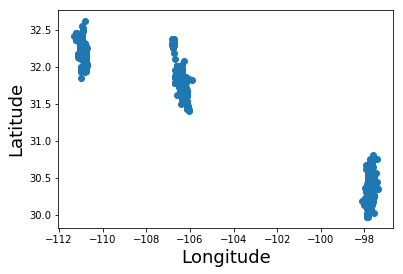

In [8]:
### CITY
import random
import matplotlib.pyplot as plt
print(len(set(loc['city']))) # 3 cities


plt.scatter(loc.center_lon, loc.center_lat)
plt.xlabel('Longitude', fontsize = 18)
plt.ylabel('Latitude', fontsize = 18)
city_list = (dict(loc['city'].value_counts()))
#  list(city_list.keys())[1]

In [9]:
import plotly
plotly.tools.set_credentials_file(username='Melrose', api_key='WJrAvtbnYiPntYQEHPhN')

In [10]:
import plotly.plotly as py
import plotly.graph_objs as go

df = loc

data = [ dict(
        type = 'scattergeo',
        locationmode = 'country names',
        lon = df['center_lon'],
        lat = df['center_lat'],
        mode = 'markers',
        marker = dict(
            size = 6,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)' # border of circle
            )
        ))]

layout = dict(
        title = 'GPS Points in Tucson',
        colorbar = True,
        geo = dict(
            scope='usa',
            projection = dict( type='mercator'),
            center = dict(lat = 32.193618, lon = -111.063911),
            lonaxis = dict( range= [ min(df['center_lon']), max(df['center_lon']) ] ),
            lataxis = dict( range= [ min(df['center_lat']), max(df['center_lat']) ] ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict(data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-airports' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Melrose/0 or inside your plot.ly account where it is named 'd3-airports'


In [74]:
# Solution 1 NOT WORK
from gmplot import gmplot
gmap = gmplot.GoogleMapPlotter(37.766956, -122.438481, 13)
top_attraction_lats, top_attraction_lons = zip(*[
    (37.769901, -122.498331),
    (37.768645, -122.475328),
    (37.771478, -122.468677),
    (37.769867, -122.466102),
    (37.767187, -122.467496),
    (37.770104, -122.470436)
    ])
gmap.scatter(top_attraction_lats, top_attraction_lons, '#3B0B39', size=40, marker=False)
gmap.draw("my_map.html")

In [9]:
### Duration
numTrip = act.groupby('user_id').size().reset_index(name='counts')
numTrip.head()

,user_id,counts
0,2,166
1,561,281
2,651,194
3,667,240
4,705,21
